In [1]:
import pandas as pd 
import scipy.stats as st
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.pyplot import figure 
from scipy.stats import linregress
import random 


In [2]:
global_temps = pd.read_csv("data_sets/GlobalTemperatures_kaggle.csv")
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [3]:
np.dtype(global_temps["dt"])

dtype('O')

In [4]:
global_temps.dropna(how = "any", inplace = True)
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [5]:
# retrieving first value in list of values separated by hyphen
splited_series = global_temps['dt'].str.split('-').str[0]
splited_series

#replacing hyphen so we can filter for years
#global_temps_dt = [x.replace("-","") for x in global_temps["dt"]]

1200    1850
1201    1850
1202    1850
1203    1850
1204    1850
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 1992, dtype: object

In [6]:
#adding as new series
global_temps["year"] = splited_series.astype("int64")


In [7]:
#checking if new column is added
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [8]:
#checking data type
 print(np.dtype(global_temps["year"]))

int64


In [9]:
global_temps

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850
...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


In [10]:
#getting data from last 50 years; 1966 to 2015 
average_temperatures = global_temps.groupby("year")["LandAndOceanAverageTemperature"].sum()/12
average_temperatures

year
1850    14.867167
1851    14.991833
1852    15.006500
1853    14.955167
1854    14.991000
          ...    
2011    15.769500
2012    15.802333
2013    15.854417
2014    15.913000
2015    16.058583
Name: LandAndOceanAverageTemperature, Length: 166, dtype: float64

In [11]:
ave_temps_year = pd.DataFrame(average_temperatures)

ave_temps_year.rename(columns = {"LandAverageTemperature":"Global Average Temperature"}, inplace = True)

In [12]:
ave_temps_year

,LandAndOceanAverageTemperature
year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000
...,...
2011,15.769500
2012,15.802333
2013,15.854417


In [13]:
mean_co2_emission = pd.read_excel("data_sets/global_mean_CO2_emissions_year.xlsx")
mean_co2_emission

,year,yearly mean co2 emission (ppm)
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
57,2016,404.22
58,2017,406.55
59,2018,408.52
60,2019,411.43


In [14]:
merged_df = pd.merge(ave_temps_year, mean_co2_emission, on = "year", how = "outer")
merged_df

,year,LandAndOceanAverageTemperature,yearly mean co2 emission (ppm)
0,1850,14.867167,NaN
1,1851,14.991833,NaN
2,1852,15.006500,NaN
3,1853,14.955167,NaN
4,1854,14.991000,NaN
...,...,...,...
166,2016,NaN,404.22
167,2017,NaN,406.55
168,2018,NaN,408.52
169,2019,NaN,411.43


In [15]:
merged_df.dropna(how = "any", inplace = True)
merged_df

,year,LandAndOceanAverageTemperature,yearly mean co2 emission (ppm)
109,1959,15.340500,315.98
110,1960,15.291917,316.91
111,1961,15.379917,317.64
112,1962,15.325583,318.45
113,1963,15.376667,318.99
114,1964,15.117083,319.62
115,1965,15.195750,320.04
116,1966,15.264667,321.37
117,1967,15.294167,322.18
118,1968,15.263917,323.05


# Scatter plot and Line of regression

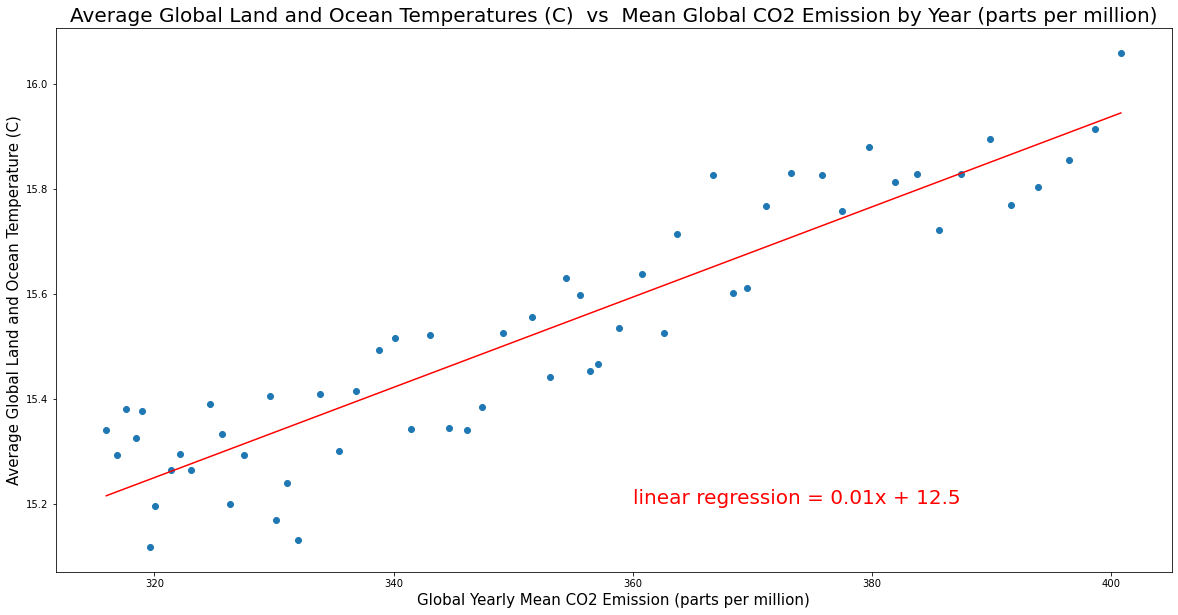

In [26]:
#creating x and y values
x_values = merged_df["yearly mean co2 emission (ppm)"]
y_values = merged_df["LandAndOceanAverageTemperature"]


#scatter plot configuration
plt.figure(figsize=(20, 10))
plt.scatter(x_values, y_values)
plt.xlabel("Global Yearly Mean CO2 Emission (parts per million)",fontsize=15)
plt.ylabel("Average Global Land and Ocean Temperature (C)",fontsize=15)
plt.title("Average Global Land and Ocean Temperatures (C)  vs  Mean Global CO2 Emission by Year (parts per million)",fontsize=20)

#plotting line of regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
y_values_line = slope*x_values + intercept

line_eq = f"linear regression = {round(slope,2)}x + {round(intercept,2)}"

plt.annotate(line_eq,(360,15.2),fontsize=20,color="red")

plt.plot(x_values, y_values_line, color = "red")

plt.show()

In [17]:
happy_2015 = pd.read_csv("data_sets/2015_to_2019_happiness_index_data_kaggle/2015.csv")
happy_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [18]:
country_list = random.sample(list(happy_2015["Country"]), 10)
country_list

['Canada',
 'Lithuania',
 'Hong Kong',
 'Rwanda',
 'Panama',
 'Palestinian Territories',
 'Bangladesh',
 'Bosnia and Herzegovina',
 'Portugal',
 'Laos']

In [19]:
y = happy_2015.loc[happy_2015["Country"] == "Rwanda","Happiness Score"]
y

153    3.465
Name: Happiness Score, dtype: float64

In [20]:
x = np.arange(len(country_list))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
happiness_value_list = []

for country in country_list:
    #happy_2015.loc[happy_2015["Country"] == "Kenya","Happiness Score"]
    happiness_value_list.append(list(happy_2015.loc[happy_2015["Country"] == country,"Happiness Score"])[0])

happy_2015.loc[happy_2015["Country"] == country,"Happiness Score"]

In [23]:
happiness_value_list

[7.4270000000000005,
 5.832999999999999,
 5.474,
 3.465,
 6.7860000000000005,
 4.715,
 4.694,
 4.949,
 5.102,
 4.876]

# Happiness and CO2 Levels comparison

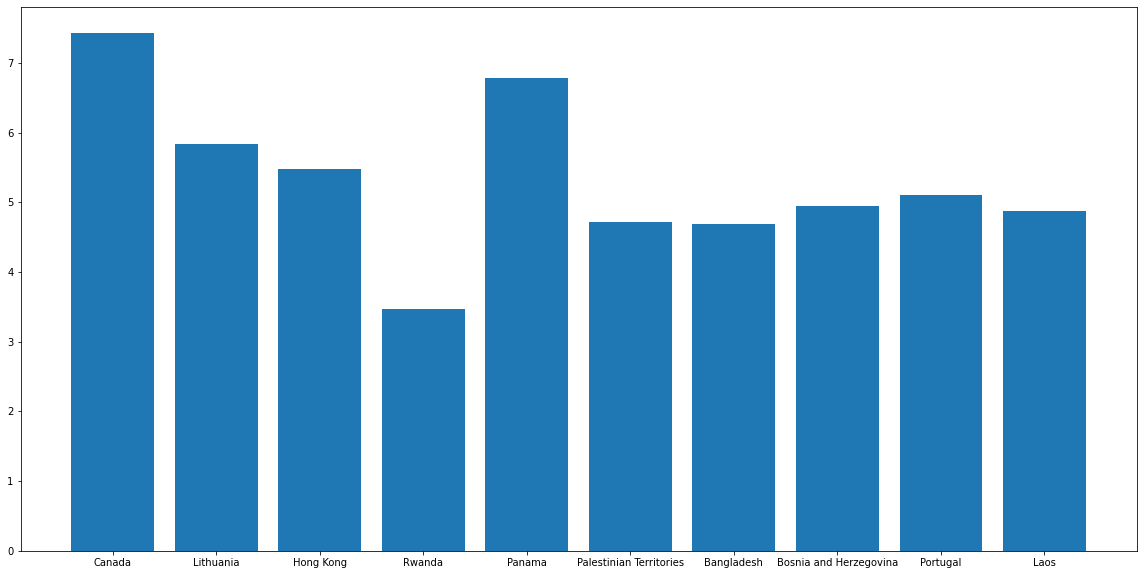

In [24]:
plt.figure(figsize= (20,10))

plt.bar(x,happiness_value_list)


plt.xticks(list(x),country_list)
plt.show()